# Logistic Regression
10/02/23 Monika Voutov

In [122]:
import pandas as pd
import statsmodels.formula.api as smf

# Import Data

In [123]:
training_data = pd.read_csv('data/framingham_train.csv')
testing_data = pd.read_csv('data/framingham_test.csv')

In [124]:
#training_data.head()

In [125]:
# check the shape of training and testing data
training_data.shape, testing_data.shape

((2560, 16), (1098, 16))

# Logistic Regression

In [135]:
logreg = smf.logit(formula ='TenYearCHD ~ male + age + education +'\
                            'currentSmoker + cigsPerDay + BPMeds +'\
                            'prevalentStroke + prevalentHyp + diabetes + '\
                            'totChol + sysBP + diaBP + BMI + '\
                            'heartRate + glucose',
                    data = training_data).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.371879
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                  0.1102
Time:                        15:55:24   Log-Likelihood:                -952.01
converged:                       True   LL-Null:                       -1069.9
Covariance Type:            nonrobust   LLR p-value:                 1.627e-40
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

## Logistic Regression Formula

### **Answer 1 a) i**

The probability $ P(Y = 1 | X) $ can be computed using the logistic regression model as follows:
\begin{aligned}
P(Y = 1 | X ) = \frac{1}{1 + e^{-x}}
\end{aligned}
Where $ x $ is a linear combination of the model coefficients and feature values, represented as:

\begin{aligned}
x = & -8.0533 \\
& + 0.0041 \cdot \text{{education[High school/GED]}} \\
& + 0.1267 \cdot \text{{education[Some college/vocational school]}} \\
& + 0.1930 \cdot \text{{education[Some high school]}} \\
& + 0.5124 \cdot \text{{male}} \\
& + 0.0637 \cdot \text{{age}} \\
& + 0.0608 \cdot \text{{currentSmoker}} \\
& + 0.0190 \cdot \text{{cigsPerDay}} \\
& + 0.1631 \cdot \text{{BPMeds}} \\
& + 0.7908 \cdot \text{{prevalentStroke}} \\
& + 0.2797 \cdot \text{{prevalentHyp}} \\
& - 0.0086 \cdot \text{{diabetes}} \\
& + 0.0027 \cdot \text{{totChol}} \\
& + 0.0133 \cdot \text{{sysBP}} \\
& - 0.0066 \cdot \text{{diaBP}} \\
& + 0.0150 \cdot \text{{BMI}} \\
& - 0.0056 \cdot \text{{heartRate}} \\
& + 0.0054 \cdot \text{{glucose}}
\end{aligned}

### **Answer 1 a) ii**

The most important(significant) factors are: `male`, `age`, `cigsPerDay`, `sysBP`, `totChol`, and `glycose`. These are the only values that have p-small values below significance level 0.05%.

The factor `male` means that a male (gender) has a higher chance of developing CHD in the next 10 years (than a female) by $ e^{0.5124} = 1.6693$. 

### **Answer 1 a) iii**

**The Loss from Treatment:** \
$PL(with treatment) = 0.1*p*1,050,000 + (1 - 0.1*p)*95,000$\
**The Loss from No Treatment:**\
 $PL(no treatment) = p*955,000 + (1-p)*0$

The threshold $p(bar) = \frac{95,000}{859,500} = 0.1105$ therefore, if the patient's risk is higher than the $p(bar)$ value, it is optimal to prescribe the medication.

In [127]:
# Predicting the probability of default
y_prob = logreg.predict(testing_data)

# Predicting the label
y_pred = pd.Series([1 if x > 0.1105 else 0 for x in y_prob], index=y_prob.index)

In [128]:
from sklearn.metrics import confusion_matrix
y_test = testing_data['TenYearCHD']

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[495 423]
 [ 31 149]]


### **Answer 1 a) iv**

**True Negative:** 495\
**False Negative:** 31\
**False Positive:** 423\
**True Positive:** 149

**Accuracy:** $ \frac{(TP+TN)}{ALL}  = \frac{495 + 149}{495+31+423+149} = 0.587$ or 58.7%

**TPR (Sensitivity):** $ \frac{TP}{TP + FN} = \frac{149}{149 + 31} = 0.828$ or 82.8%

**FPR (Specificity):** $ \frac{TN}{TN + FP} = \frac{495}{495 + 423} = 0.461$ or 46.1%
 

The test is 58.7% accurate, therefore, 58.7% of the time we can correctly identify whether a person will develop CHD.

82.8% of the time the model can identify the people who indeed develop CHD.

53.9% of the time the model can identify the people who would NOT develop CHD.

### **Answer 1 a) v**

**Not accounting for the special probabilities (CHD medication does not affect the outcomes):**

$ \frac{TP * 1,050,000 + FP * 95,000 + FN * 955,000 + FP * 0}{total} = $ 

$ \frac{149 * 1,050,000 + 423 * 95,000 + 31 * 955,000 + 423 * 0}{1098}= \frac{226240000}{1098} = \$206,047.36$ 


**Accounting for the special probabilities (CHD medication not affects the outcomes):**

$ \frac{0.1* TP * 1,050,000 +  ((1-0.1)*TP + FP )* 95,000  + FN * 955,000 + FP * 0}{total} = $ 

$ \frac{0.1* 149 * 1,050,000 + (0.9 * 149 + 423) * 95,000 + 31 * 955,000 + 423 * 0}{1098}= \frac{98174500}{1098} = \$89,412.11$ 


Accounting for the different odds for prescribing the medication, we observe a drastically improved economic cost per patient. Not accounting for the fact that the treatment impacts patient's risk of developing CHD is not reasonable estimate (the first calculation we did) because if the CHD treatment indeed affects outcomes, the cost would be different, hense, the second calculation.


### **Answer 1 a) vi**

In [129]:
#For high threshol
# 1. Predicting the probability of default
y_prob2 = logreg.predict(testing_data)
# 2. Predicting the label
y_pred2 = pd.Series([1 if x > 1 else 0 for x in y_prob2], index=y_prob2.index)

y_test2 = testing_data['TenYearCHD']

cm = confusion_matrix(y_test2, y_pred2)
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[918   0]
 [180   0]]


**New Accuracy:** $ \frac{(TP+TN)}{ALL}  = \frac{918}{918+180} = 0.836$ or 83.6%

**TPR:** 0

**FPT:** 0

**Cost per Patient:**

$ \frac{0.1* TP * 1,050,000 +  ((1-0.1)*TP + FP )* 95,000  + FN * 955,000 + FP * 0}{total} = $ 

$ \frac{0 * 1,050,000 + 0* 95,000 + 180 * 955,000 + 918 * 0}{1098}= \frac{171,900,000}{1098} = \$156,557.38$ 

Using a simple baseline model that predicts none of the patients are at high risk gives us a very high accuracy. However it will not predict potential chance of developing CHD, therefore nooone would be prescribed medication. Thus this will lead to much higher treatment/economic cost per patient since noone will be medicated prior to reduce the development of CHD.

### **Answer 1 a) vii**

Female, age 39, GED education, currently a smoker with an average of 6 cigarettes
per day. Currently not on blood pressure medication, has not had stroke
and is not hypertensive. Currently diagnosed with diabetes; total Cholesterol
at 230. Systolic/diastolic blood pressure at 110/50, BMI at 28, heart
rate at 72, glucose level at 80.

Female implies male = 0\
Age = 39\
Education is GED, so education[High school/GED] = 1, and all other education dummy variables are 0\
CurrentSmoker = 1 (as the patient is currently a smoker)\
CigsPerDay = 6\
BPMeds = 0 (as the patient is not on blood pressure medication)\
PrevalentStroke = 0 (as the patient has not had a stroke)\
PrevalentHyp = 0 (as the patient is not hypertensive)\
Diabetes = 1 (as the patient is currently diagnosed with diabetes)\
TotChol = 230\
SysBP = 110\
DiaBP = 50\
BMI = 28\
HeartRate = 72\
Glucose = 80

\begin{aligned}
P(Y = 1 | X ) = \frac{1}{1 + e^{-x}}
\end{aligned}

$x=− 8.0533 + 0.0041 * 1 + 0.0637 * 39 + 0.0608 * 1 + 0.0190 * 6 − 0.0086* 1 + 0.0027* 230 + 0.0133* 110 - 0.0066* 50 + 0.0150* 28 - 0.0056* 72 + 0.0054* 80$

In [130]:
import math

# Calculation of x
x = (
    -8.0533 + 
    0.0041 * 1 +    # education[High school/GED]
    0.0637 * 39 +   # age
    0.0608 * 1 +    # currentSmoker
    0.0190 * 6 +    # cigsPerDay
    -0.0086 * 1 +   # diabetes
    0.0027 * 230 +  # totChol
    0.0133 * 110 +  # sysBP
    -0.0066 * 50 +  # diaBP
    0.0150 * 28 +   # BMI
    -0.0056 * 72 +  # heartRate
    0.0054 * 80     # glucose
)

# Calculating the probability P(Y = 1 | X)
p = 1 / (1 + math.exp(-x))

# Print the results
print("x:", x)
print("P(Y = 1 | X):", p)


x: -3.1959000000000013
P(Y = 1 | X): 0.03932030490354147


The predicted probability that this patient will experience CHD is 3.93%. based on the $p(hat) = 0.11 (11\%)$, the physician should not prescribe the preventative medication for this patient.

## ROC CURVE

#### Answer 1 b)

In [131]:
y_train = training_data['TenYearCHD']
X_train = training_data.drop(['TenYearCHD'], axis=1)

y_test = testing_data['TenYearCHD']
X_test = testing_data.drop(['TenYearCHD'], axis=1)

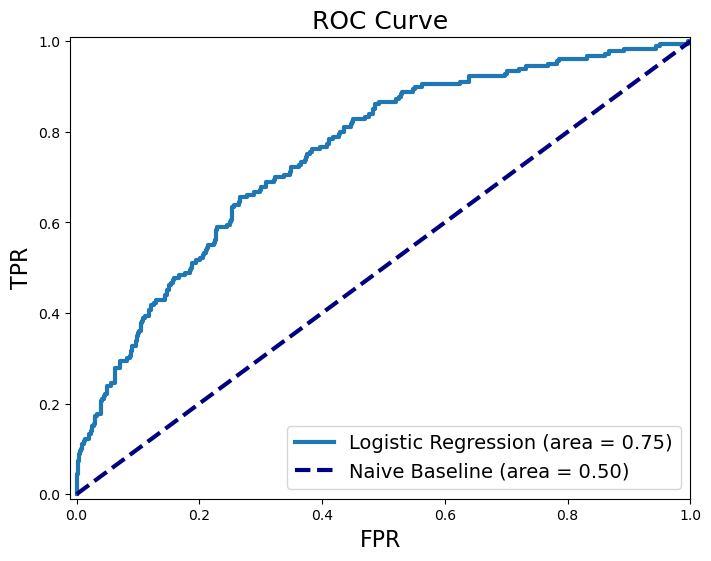

In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

Naive Baseline of 0.5 is equivalent to a random guessing - We want AUC to be located in the top left diagonal of the graph. 

This model has an ROC-AUC of 0.75, which is significantly better than random guessing. One important finding is that this model has better discriminatory power between the positive and negative classes than the Naive baseline. 

The ROC curve ilustrates the trade-off between TPR and FPR. This is a very imporant information for decision makers to find the optimal balance betweek clinical and economic implications of the outcomes of patients. 

The cutoff value should be where the True Positive (1,050,000 )is high and False Positive is low. The current TPR and FPR are 82.8% and 46.1% respectively, which is a significant improvement from the naive baseline. 

### **Answer 1 c)**

This question can be answered as an economic model approach by looking into individual's utility function.

Suppose, each patient has a utility function representing their well-being, where higher utility represents better well-being. A patient will choose the option that maximizes their expected utility.

Patients are making decisions under uncertainty about whether they will develop CHD. They will weigh the expected utility of paying the co-payment and potentially preventing CHD against not paying the co-payment and risking the development of CHD with its associated costs.

Time discount factors should be incorporated to account for the fact that individuals may value present benefits and costs differently from future benefits and costs. If the benefits (or costs) are in the future (for some they will be way out in the future), they would be discounted back to their present value.


There are several ethical implications with co-payment plans as well, such as accessibility for this medication or treatment for low income indviduals. A high co-payment plan can prevent underpreviledged indiviuals accessing a necessary treatment leading to health inequities. More importantly, insurance companies' primary goal is make a profit. Finding an optimal balance between maximizing profit and optimizing patient outcomes might be challenging to accomplish, since they cannot truly coexist.


### **Answer 1 d)**



Yes, an ethical concern would be the fact we would allow for false negatives (31), which means we let 31 people not be treated with the medication, which could have improved their life quality (or prevented them from worsening their life's quality). However, the entire model is solely based on minimizing cost rather than focusing on the best patient outcomes. 

I understand that there is a fine line and limitation of resources, so we might not be able to administer the medication to all, but there should be considerable attention to any possible risks and perhaps refining the model to better account for the false negatives.

In [137]:
%%capture
!jupyter nbconvert --to html homework2.ipynb